In [1]:
import keras
from keras.models import Model
from keras import layers
from keras.layers import Dense, Input, BatchNormalization, Activation
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.utils.data_utils import get_file


Using TensorFlow backend.


In [0]:
from keras.layers.convolutional import  AveragePooling2D
from keras.layers.merge import concatenate

In [0]:
from keras.layers import Input, Dropout, Dense, Flatten, Activation


In [4]:
#loading dataset
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#weight and height of image training
img_rows,img_cols = 28,28
#variables
batch_size = 32
num_classes = 10
epochs = 15

In [0]:
### check chanel of image
from keras import backend as K
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
#normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_test.shape)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(10000, 28, 28, 1)


In [0]:
#convert output to category
# from keras.utils import to_categorical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def Inception(img_shape):
  img_input = Input(shape=img_shape)
  #block1
  b1 = Conv2D(64, kernel_size=(1,1), padding='same', activation='relu')(img_input)
  
  
  b2 = Conv2D(32, kernel_size=(1,1), padding='same', activation='relu')(img_input)
  b2 = Conv2D(64, kernel_size=(5,5), padding='same', activation='relu')(b2)
  
  b3 = Conv2D(32, kernel_size=(1,1), padding='same', activation='relu')(img_input)
  b3 = Conv2D(48, kernel_size=(3,3), padding='same', activation='relu')(b3)
  b3 = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(b3)
  
  
  b4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(img_input)
  b4 = Conv2D(64, kernel_size=(1,1), padding='same', activation='relu')(b4)
  
  x = concatenate([b1,b2,b3,b4], axis=1)
  x = Dropout(0.5)(x)
  x = Flatten()(x)
#   x = Dense(64, activation='relu')(x)
#   x = Dropout(0.5)(x)
  out = Dense(10, activation='softmax')(x)
  model = Model(inputs=img_input, outputs=out)
  return model
  

In [0]:
model = Inception(input_shape)

In [0]:
from keras import optimizers
adam = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 32)   64          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 32)   64          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 28, 28, 48)   13872       conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [19]:
history = model.fit(x_train,y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 866us/step - loss: 0.3955 - acc: 0.8890 - val_loss: 0.2440 - val_acc: 0.9313
Epoch 2/10
60000/60000 [==============================] - 52s 860us/step - loss: 0.2199 - acc: 0.9362 - val_loss: 0.1528 - val_acc: 0.9578
Epoch 3/10
60000/60000 [==============================] - 52s 860us/step - loss: 0.1359 - acc: 0.9610 - val_loss: 0.0980 - val_acc: 0.9712
Epoch 4/10
60000/60000 [==============================] - 51s 858us/step - loss: 0.0970 - acc: 0.9717 - val_loss: 0.0743 - val_acc: 0.9768
Epoch 5/10
60000/60000 [==============================] - 52s 861us/step - loss: 0.0809 - acc: 0.9767 - val_loss: 0.0666 - val_acc: 0.9795
Epoch 6/10
60000/60000 [==============================] - 51s 858us/step - loss: 0.0711 - acc: 0.9787 - val_loss: 0.0570 - val_acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 52s 860us/step - loss: 0.0632 - acc: 0.9809 - val_loss: 0.

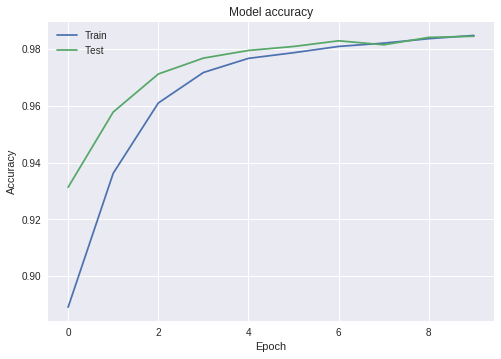

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

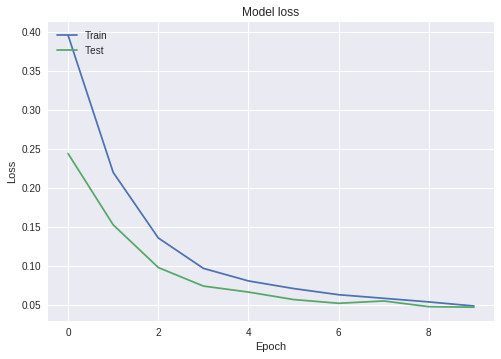

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()